In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
time_t_3060 = []
time_d_3060 = [] 
time_t_K80 = []
time_d_K80 = []
time_t_P100 = []
time_d_P100 = []  
time_t_V100 = []
time_d_V100 = []  

# Get all of the results csv files
# Extract training and data loading time from the csv files
 
for i in os.listdir("results"):
    if i.split("_")[0] == "3060":
        df = np.array(pd.read_csv(os.path.join("results", i)))
        time_t_3060.append(df[0][2]*1000)
        time_d_3060.append(df[0][3]*1000)
    elif i.split("_")[0] == "P100":
        df = np.array(pd.read_csv(os.path.join("results", i)))
        time_t_P100.append(df[0][2]*1000)
        time_d_P100.append(df[0][3]*125)
    elif i.split("_")[0] == "K80":
        df = np.array(pd.read_csv(os.path.join("results", i)))
        time_t_K80.append(df[0][2]*1000)
        time_d_K80.append(df[0][3]*1000)
    elif i.split("_")[0] == "V100":
        df = np.array(pd.read_csv(os.path.join("results", i)))
        time_t_V100.append(df[0][1])
        time_d_V100.append(df[0][2])
    


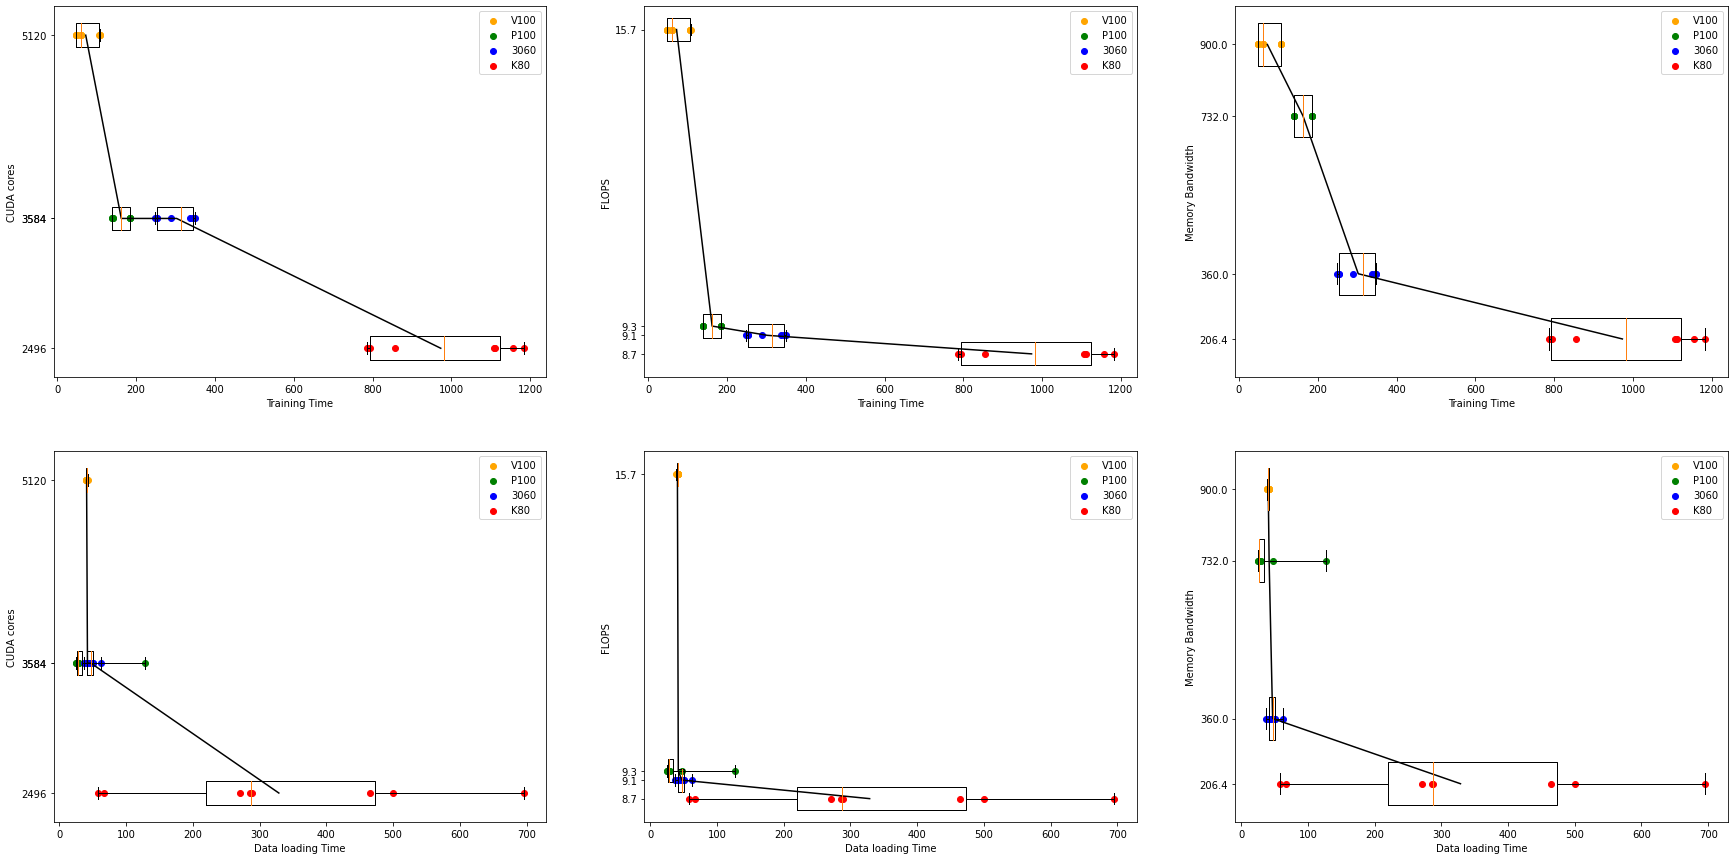

In [16]:
cuda_cores = [5120, 3584,3584,2496]
flops = [15.7, 9.3, 9.1, 8.7]
memory_bw = [900, 732, 360, 480*0.43]


# Create a 2x3 grid and plot training time along the first row and data loading time in second row
# Plot the boxplot along with the scatter plots
fig, axs = plt.subplots(2, 3, figsize=(30,15))
axs[0][0].scatter(time_t_V100, [cuda_cores[0]]*12, color="orange", label="V100")
axs[0][0].scatter(time_t_P100, [cuda_cores[1]]*8, color="green", label="P100")
axs[0][0].scatter(time_t_3060, [cuda_cores[2]]*8, color="blue", label="3060")
axs[0][0].scatter(time_t_K80, [cuda_cores[3]]*8, color="red", label="K80")
axs[0][0].plot([np.mean(time_t_V100),np.mean(time_t_P100),np.mean(time_t_3060),np.mean(time_t_K80) ], cuda_cores, color="black")
axs[0][0].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ], widths=200, positions=cuda_cores, vert=False)
axs[0][0].set_xlabel("Training Time")
axs[0][0].set_ylabel("CUDA cores")
axs[0][0].legend()

axs[0][1].scatter(time_t_V100, [flops[0]]*12, color="orange", label="V100")
axs[0][1].scatter(time_t_P100, [flops[1]]*8, color="green", label="P100")
axs[0][1].scatter(time_t_3060, [flops[2]]*8, color="blue", label="3060")
axs[0][1].scatter(time_t_K80, [flops[3]]*8, color="red", label="K80")
axs[0][1].plot([np.mean(time_t_V100),np.mean(time_t_P100),np.mean(time_t_3060),np.mean(time_t_K80) ], flops, color="black")
axs[0][1].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ],  positions=flops, vert=False)
axs[0][1].set_xlabel("Training Time")
axs[0][1].set_ylabel("FLOPS")
axs[0][1].legend()


axs[0][2].scatter(time_t_V100, [memory_bw[0]]*12, color="orange", label="V100")
axs[0][2].scatter(time_t_P100, [memory_bw[1]]*8, color="green", label="P100")
axs[0][2].scatter(time_t_3060, [memory_bw[2]]*8, color="blue", label="3060")
axs[0][2].scatter(time_t_K80, [memory_bw[3]]*8, color="red", label="K80")
axs[0][2].plot([np.mean(time_t_V100),np.mean(time_t_P100),np.mean(time_t_3060),np.mean(time_t_K80) ], memory_bw, color="black")
axs[0][2].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ], widths=100,  positions=memory_bw, vert=False)
axs[0][2].set_xlabel("Training Time")
axs[0][2].set_ylabel("Memory Bandwidth")
axs[0][2].legend()


axs[1][0].scatter(time_d_V100, [cuda_cores[0]]*12, color="orange", label="V100")
axs[1][0].scatter(time_d_P100, [cuda_cores[1]]*8, color="green", label="P100")
axs[1][0].scatter(time_d_3060, [cuda_cores[2]]*8, color="blue", label="3060")
axs[1][0].scatter(time_d_K80, [cuda_cores[3]]*8, color="red", label="K80")
axs[1][0].plot([np.mean(time_d_V100),np.mean(time_d_P100),np.mean(time_d_3060),np.mean(time_d_K80) ], cuda_cores, color="black")
axs[1][0].set_xlabel("Data loading Time")
axs[1][0].set_ylabel("CUDA cores")
axs[1][0].legend()


axs[1][1].scatter(time_d_V100, [flops[0]]*12, color="orange", label="V100")
axs[1][1].scatter(time_d_P100, [flops[1]]*8, color="green", label="P100")
axs[1][1].scatter(time_d_3060, [flops[2]]*8, color="blue", label="3060")
axs[1][1].scatter(time_d_K80, [flops[3]]*8, color="red", label="K80")
axs[1][1].plot([np.mean(time_d_V100),np.mean(time_d_P100),np.mean(time_d_3060),np.mean(time_d_K80) ], flops, color="black")
axs[1][1].set_xlabel("Data loading Time")
axs[1][1].set_ylabel("FLOPS")
axs[1][1].legend()


axs[1][2].scatter(time_d_V100, [memory_bw[0]]*12, color="orange", label="V100")
axs[1][2].scatter(time_d_P100, [memory_bw[1]]*8, color="green", label="P100")
axs[1][2].scatter(time_d_3060, [memory_bw[2]]*8, color="blue", label="3060")
axs[1][2].scatter(time_d_K80, [memory_bw[3]]*8, color="red", label="K80")
axs[1][2].plot([np.mean(time_d_V100),np.mean(time_d_P100),np.mean(time_d_3060),np.mean(time_d_K80) ], memory_bw, color="black")
axs[1][2].set_xlabel("Data loading Time")
axs[1][2].set_ylabel("Memory Bandwidth")
axs[1][0].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ], widths=200, positions=cuda_cores,whis=100, vert=False)
axs[1][1].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ],  positions=flops,whis=100, vert=False)
axs[1][2].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ], widths=100,  positions=memory_bw, whis=100, vert=False)


axs[1][2].legend()



Text(0, 0.5, 'Memory Bandwidth')

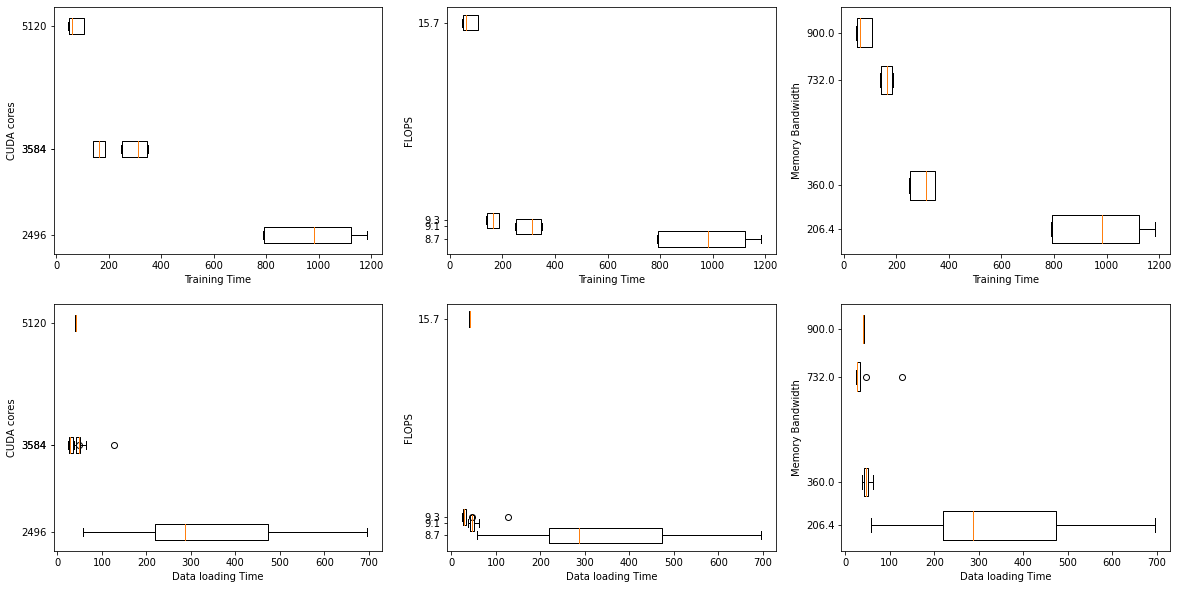

In [15]:
# Plot the box plots alone
fig, axs = plt.subplots(2, 3, figsize=(20,10))
axs[0][0].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ], widths=200, positions=cuda_cores, vert=False)
axs[0][0].set_xlabel("Training Time")
axs[0][0].set_ylabel("CUDA cores")
axs[0][1].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ],  positions=flops, vert=False)
axs[0][1].set_xlabel("Training Time")
axs[0][1].set_ylabel("FLOPS")
axs[0][2].boxplot([time_t_V100,time_t_P100, time_t_3060, time_t_K80 ], widths=100,  positions=memory_bw, vert=False)
axs[0][2].set_xlabel("Training Time")
axs[0][2].set_ylabel("Memory Bandwidth")


axs[1][0].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ], widths=200, positions=cuda_cores, vert=False)
axs[1][0].set_xlabel("Data loading Time")
axs[1][0].set_ylabel("CUDA cores")
axs[1][1].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ],  positions=flops, vert=False)
axs[1][1].set_xlabel("Data loading Time")
axs[1][1].set_ylabel("FLOPS")
axs[1][2].boxplot([time_d_V100,time_d_P100, time_d_3060, time_d_K80 ], widths=100,  positions=memory_bw, vert=False)
axs[1][2].set_xlabel("Data loading Time")
axs[1][2].set_ylabel("Memory Bandwidth")


